# Multi Layer Perceptron

In [1]:
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical

In [2]:
(train_x, train_y),(test_x, test_y) = keras.datasets.mnist.load_data()

In [3]:
print(train_x[0].shape)
print(28**2)

(28, 28)
784


In [4]:
y_train_oh = to_categorical(train_y, num_classes=10)
y_test_oh = to_categorical(test_y, num_classes=10)

x_train = train_x.reshape(-1, 784).astype('float32') / 255
x_test  = test_x.reshape(-1, 784).astype('float32') / 255

MLP

In [5]:
input1 = keras.Input(shape=(784,))
hiddenlayer = keras.layers.Dense(128,activation='relu')(input1)
hiddenlayer = keras.layers.Dense(128,activation='relu')(hiddenlayer)
output1 = keras.layers.Dense(10,activation='softmax')(hiddenlayer)

model = keras.Model(input1,output1)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
history = model.fit(
    x_train,y_train_oh,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9272 - loss: 0.2476 - val_accuracy: 0.9573 - val_loss: 0.1384
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9690 - loss: 0.1030 - val_accuracy: 0.9696 - val_loss: 0.1089
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9775 - loss: 0.0721 - val_accuracy: 0.9733 - val_loss: 0.0882
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9818 - loss: 0.0545 - val_accuracy: 0.9703 - val_loss: 0.1036
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9871 - loss: 0.0409 - val_accuracy: 0.9740 - val_loss: 0.0889
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9891 - loss: 0.0328 - val_accuracy: 0.9747 - val_loss: 0.0925
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0278 - val_accuracy: 0.9723 - val_loss: 0.1045
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9924 - loss: 0.0221 - 

In [7]:
loss, acc = model.evaluate(x_test,y_test_oh,)
print(f'test accuracy: {acc} \n loss: {loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.1031
test accuracy: 0.9750999808311462 
 loss: 0.10306722670793533


In [8]:
model.predict(x_test[9].reshape(1,784))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[1.19108472e-13, 1.46416329e-16, 5.31873629e-15, 1.47100526e-11,
        7.97441260e-08, 1.06145595e-13, 5.10851692e-18, 2.29541092e-06,
        1.95745087e-09, 9.99997616e-01]], dtype=float32)

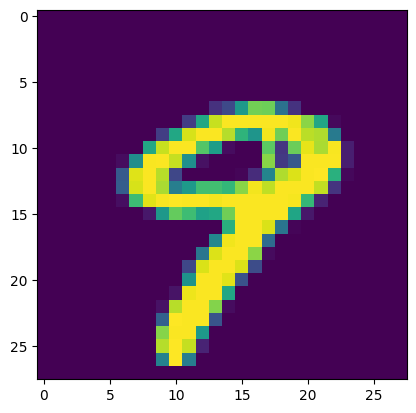

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_test[9].reshape(28,28))
plt.show()